# Bài tập tuần 12
Sử dụng 1 bộ dữ liệu time-series nhiều biến (multivariate) tại link (https://github.com/thieu1995/csv-files/tree/main/data/timeseries/multivariate)
Sử dụng 3 mô hình regression trên scikit-learn (https://scikit-learn.org/stable/search.html?q=regression).
Xây dựng bài toán dự đoán time-series nhiều biến (nhiều đầu vào và nhiều đầu ra).
+ Tối ưu hóa tham số cho các mô hình trên dùng GridSearchCV. Sau đó,
+ Lập bảng kết quả so sánh đánh giá performance metrics (RMSE, MAE, R2, MAPE,...) cho các mô hình trên dựa vào tập test.
+ Vẽ đồ thị giá trị thực tế và dự đoán.



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [3]:
# Load the data
url = "https://github.com/thieu1995/csv-files/raw/main/data/timeseries/multivariate/exchange_rate/exchange_rate.txt"
data = pd.read_csv(url, header=None)
data.head()


,0,1,2,3,4,5,6,7
0,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.5930,0.525486
1,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.5940,0.523972
2,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.5973,0.526316
3,0.7860,1.6370,0.862069,0.650618,0.211242,0.006953,0.5970,0.523834
4,0.7849,1.6530,0.861995,0.656254,0.211242,0.006940,0.5985,0.527426


In [4]:
# Prepare the data
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Define models
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor()
}

# Define parameter grids for each model
param_grids = {
    'LinearRegression': {},
    'DecisionTreeRegressor': {'max_depth': [5, 10, 15, 20, 25]},
    'RandomForestRegressor': {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15, 20]}
}


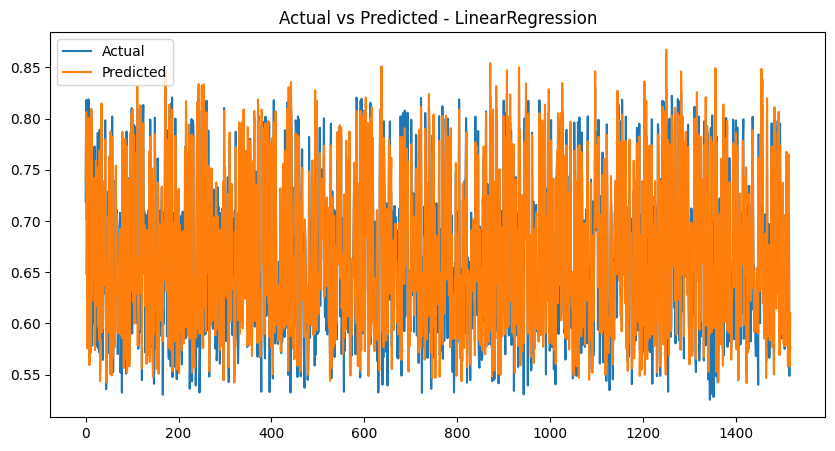

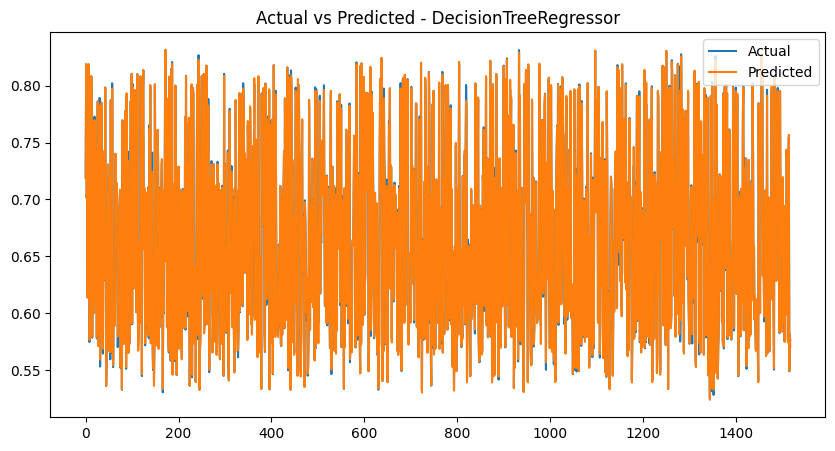

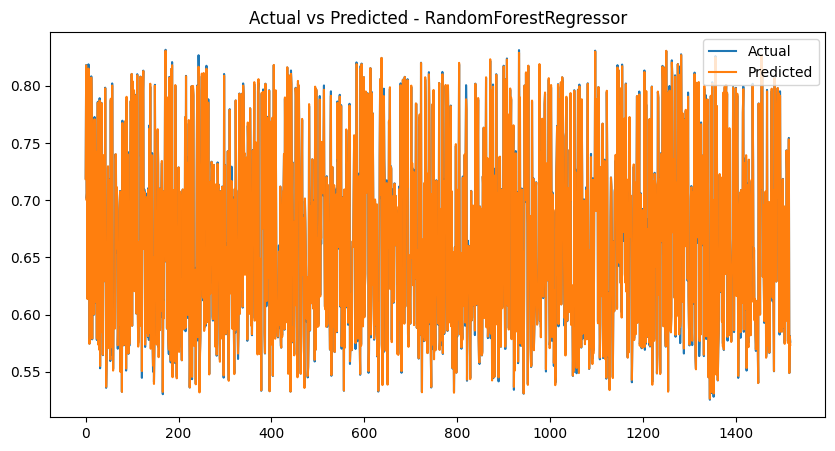

In [6]:
# Initialize results dictionary
results = {}

# Perform GridSearchCV and evaluate each model
for model_name in models:
    model = models[model_name]
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    results[model_name] = {
        'BestParams': grid_search.best_params_,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'MAPE': mape
    }

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.legend()
    plt.show()


In [8]:
# Display results
results_df = pd.DataFrame(results).T
results_df


,BestParams,RMSE,MAE,R2,MAPE
LinearRegression,{},0.025039,0.020241,0.906927,0.031363
DecisionTreeRegressor,{'max_depth': 15},0.004899,0.002233,0.996437,0.003443
RandomForestRegressor,"{'max_depth': 15, 'n_estimators': 50}",0.002798,0.00167,0.998838,0.002573
